In [40]:
from clickhouse_driver.client import Client
from tqdm import tqdm

In [41]:
client = Client('127.0.0.1')

In [42]:
limits = range(1, 10000000, 100000)

In [39]:
# With loop
from datetime import datetime

exce_time1 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT startsWith(FlightNum, '23') FROM ontime ESC LIMIT {}".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time1.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:42<00:00,  2.22s/it]


In [43]:
# With StringRef::operator==
from datetime import datetime

exce_time2 = []

for limit in tqdm(limits):
    progress = client.execute_with_progress("SELECT startsWith(FlightNum, '234') FROM ontime ESC LIMIT {}".format(limit))

    started_at = datetime.now()
    rv = progress.get_result()
    now = datetime.now()
    exce_time2.append((now - started_at).total_seconds())

100%|██████████| 100/100 [03:27<00:00,  2.08s/it]


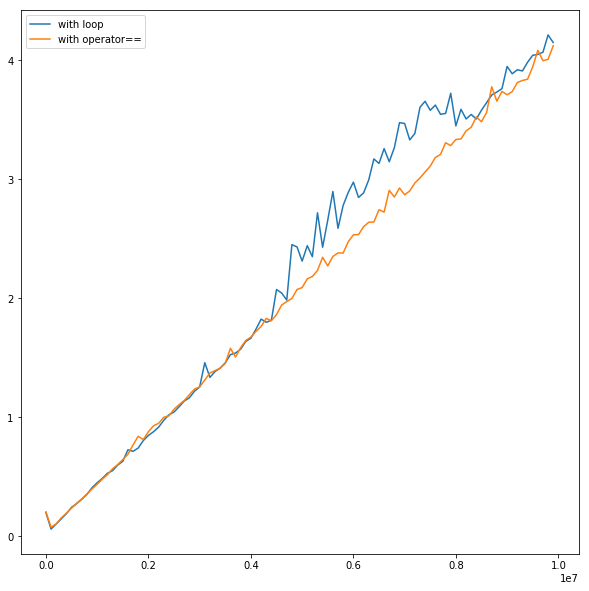

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.plot(limits, exce_time1, label="with loop")
plt.plot(limits, exce_time2, label="with operator==")
plt.legend()
plt.show()

### Заметим, что при увеличении кол-ва данных реализация с циклом по байтам проигрывает